럭키백 안에 들어가 있을 생선 종류의 확률을 구해보자.  
럭키백 안에 들어갈 수 있는 생선은 7개이며 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을때 7개 생선에 대한 확률을 출력해야 한다.  
이번에는 길이, 높이, 두께 외에도 대각선 길이와 무게도 사용한다.

회귀 문제일까? 분류 문제일까?  
먼저, **k-최근접 이웃**을 이용하여 주변 이웃의 클래스 비율을 확률이라고 출력해보자.  
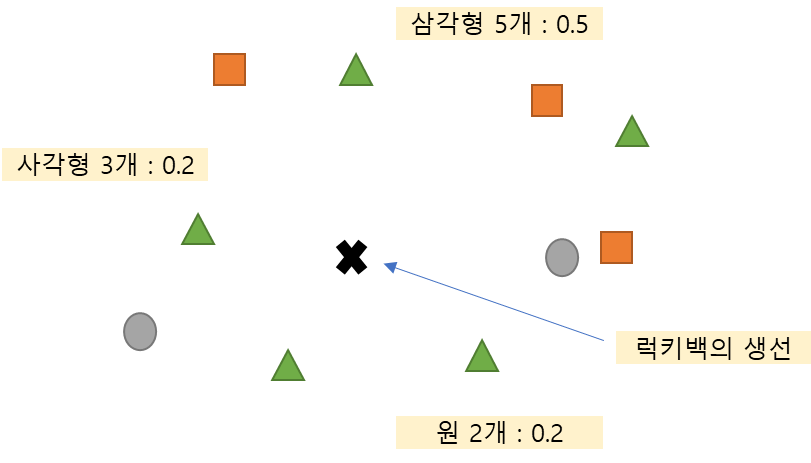  

  
사이킷런의 k-최근접 이웃 분류기도 이와 동일한 방식으로 클래스 확률을 계산하여 제공한다.  
데이터를 준비하고 k-최근접 이웃 분류기로 럭키백에 들어간 생선의 확률을 계산해보자

### 데이터 준비하기  
판다스의 read_csv() 함수로 CSV 파일을 데이터프레임으로 변환한 다음 head() 메서드로 처음 5개 행을 출력해보자.

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


맨 왼쪽의 0,1,2 와 같은 숫자는 행 번호(판다스의 인덱스)이다. 맨 위에 쓰여진 species, weight, length, diagonal, height, width는 열 제목이다.  
판다스는 CSV 파일의 첫 줄을 자동으로 인식해 열 제목으로 만들어준다.

#### 데이터프레임?  
데이터프레임은 판다스에서 제공하는 2차원 표 형식의 주요 데이터 구조이다. 데이터프레임은 넘파이 배열과 비슷하게 열과 행으로 이루어져 있다. 데이터프레임은 통계와 그래프를 위한 메서드를 풍부하게 제공한다.

어떤 종류의 생선이 있는지 Species 열에서 고유한 값을 추출해 보자. 판다스의 unique() 함수를 사용한다.

In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


이 데이터프레임에서 Species 열을 타깃으로 만들고 나머지 5개 열은 입력 데이터로 사용한다.  
데이터프레임에서 열을 선택하는 방법은 데이터프레임에서 원하는 열을 리스트로 나열하면 된다.  
Species 열을 빼고 나머지 5개 열을 선택해 보자.

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환된다.  
이를 to_numpy() 메서드로 넘파이 배열로 바꾸어 fish_input에 저장했다. fish_input에 5개의 특성이 잘 저장되었는지 처음 5개 행을 출력해보자.

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


동일한 방법으로 타깃 데이터를 생성한다.

Species 열을 선택할 때 fish[['Species']]와 같이 괄호를 두개 사용하지 않도록 주의해야한다. 이렇게 하면 fish_target이 2차원 배열이 된다.

In [5]:
fish_target = fish['Species'].to_numpy()

데이터를 훈련 세트와 테스트 세트로 나눈다.

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

그 다음 사이킷런의 StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리 해야한다. 이때 훈련 세트의 통계 값으로 테스트 세트를 변환해야 한다는 점을 잊지 말아야한다.

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

필요한 데이터가 준비되었다. k-최근접 이웃 분류기로 테스트 세트에 들어 있는 확률을 예측해 보자.

###  k-최근접 이웃 분류기의 확률 예측  
2장에서 했던 것처럼 사이킷런의 KNeighborsClassifier 클래스 객체를 만들고 훈련 세트로 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 확인해 보자. 최근접 이웃 개수인 k를 3으로 지정하여 사용한다.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85
